In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from glob import glob 
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [ ]:
cancer_positive = glob("breastcancer/Cancer/*.jpg")
cancer_negative = glob("breastcancer/Negative/*.jpg")

In [ ]:
print(f"Number of cancer positive: {len(cancer_positive)}")
print(f"Number of cancer negative: {len(cancer_negative)}")

In [ ]:
sns.barplot(x=['cancer positive:', 'cancer negative'], y=[len(cancer_positive), len(cancer_negative)])
plt.title("Class Distribution")
plt.show()

In [ ]:
X, y = load_images("breastcancer")

In [ ]:

# Convert labels (e.g., "Cancer", "Normal") to numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts "Cancer" -> 1, "Normal" -> 0




In [ ]:
#Defining NN model 
# They include the Sigmoid, Tanh, ReLU, Linear, Binary Threshold, Softmax, and Stochastic Binary functions.
model = Sequential([
    Flatten(input_shape= (224,224,3)), #flatten image
    Dense(512,activation = "relu"),
    Dropout(0.4),
    Dense(256,activation = "relu"),
    Dropout(0.4),
    Dense(128,activation = "relu"),
    Dense(1,activation = "sigmoid") #Output layer
    
])

In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(X,y, epochs = 10, batch_size = 30, validation_split = 0.2)

In [ ]:
loss, accuracy = model.evaluate(X, y)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

In [ ]:


def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to match training data
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Path to a new test image
test_img = "breastcancer/Negative/80.jpg"
test_data = preprocess_image(test_img)
# print(test_data)




# Make a prediction
prediction = model.predict(test_data)
print("Prediction:", prediction)

# # Interpret results
if prediction[0][0] > 0.5:
    print("Result: Normal Tissue")
else:
    print("Result: Cancer Detected")


1/1 [==============================] - 0s 59ms/step


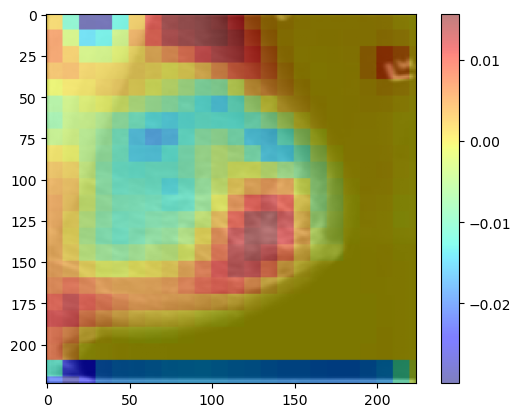

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Cant unders

def occlusion_sensitivity(model, image, patch_size=20, step=10):
    """
    Generates an occlusion sensitivity map by covering parts of the image.
    
    Args:
        model: Trained model
        image: Input image (must match model input size)
        patch_size: Size of the occlusion patch
        step: Step size for sliding the patch
    
    Returns:
        heatmap: Occlusion sensitivity map
    """
    heatmap = np.zeros((image.shape[0], image.shape[1]))  # Same size as image
    original_pred = model.predict(image[np.newaxis, ...])[0, 0]  # Get original prediction

    for x in range(0, image.shape[0], step):
        for y in range(0, image.shape[1], step):
            occluded_img = image.copy()
            occluded_img[x:x+patch_size, y:y+patch_size, :] = 0  # Place black patch

            new_pred = model.predict(occluded_img[np.newaxis, ...])[0, 0]
            heatmap[x:x+patch_size, y:y+patch_size] = original_pred - new_pred  # Measure change

    return heatmap

# Example usage:
image = X[50]  
# Use an example image
heatmap = occlusion_sensitivity(model, image)

# Plot the heatmap
plt.imshow(image)
plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap
plt.colorbar()
plt.show()
